In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Here we are going to explore the data about confirmed cases of different diseases provided by the government institution SIVIGILA for the years 2017 and 2018. t

In [2]:
data=pd.read_parquet('../parquet_datasets/sivigila_2017_2018.parquet')

In [3]:
data

,index,CONSECUTIVE,COD_EVE,FEC_NOT,SEMANA,ANO,COD_PRE,COD_SUB,EDAD,UNI_MED,...,FM_UNIDAD,FM_GRADO,confirmados,Evento,Departamento_ocurrencia,Municipio_ocurrencia,Departamento_residencia,Municipio_residencia,est_f_caso,nom_est_f_caso
0,0,5429581,205,2017-08-28,31,2017,1100109111,1,46,1,...,nan,nan,1,CHAGAS,NORTE SANTANDER,TIBU,NORTE SANTANDER,TIBU,3.0,Confirmado por laboratorio
1,1,5429832,205,2017-05-10,2,2017,1100109111,1,87,1,...,nan,nan,1,CHAGAS,BOYACA,MONIQUIRA,BOGOTA,BOGOTA,3.0,Confirmado por laboratorio
2,2,5423281,205,2017-09-08,33,2017,1100109111,1,58,1,...,nan,nan,1,CHAGAS,TOLIMA,CARMEN DE APICALA,TOLIMA,CARMEN DE APICALA,3.0,Confirmado por laboratorio
3,3,5422421,205,2017-08-16,28,2017,1100109111,1,68,1,...,nan,nan,1,CHAGAS,SANTANDER,SUCRE,CUNDINAMARCA,ZIPAQUIRA,3.0,Confirmado por laboratorio
4,4,5422463,205,2017-10-27,8,2017,1100109111,1,70,1,...,nan,nan,1,CHAGAS,CUNDINAMARCA,TOCAIMA,BOGOTA,BOGOTA,3.0,Confirmado por laboratorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141005,817,5809260,895,2018-07-10,28,2018,7600100037,5,36,1,...,nan,nan,1,ZIKA,VALLE,CALI,VALLE,CALI,4.0,Confirmado por Clínica
141006,818,5849493,895,2018-09-24,39,2018,7600100037,5,51,1,...,nan,nan,1,ZIKA,VALLE,CALI,VALLE,CALI,4.0,Confirmado por Clínica
141007,819,5849495,895,2018-05-16,19,2018,7600100037,5,38,1,...,nan,nan,1,ZIKA,VALLE,CALI,VALLE,CALI,4.0,Confirmado por Clínica
141008,820,5849496,895,2019-03-27,28,2018,7600105817,1,47,1,...,nan,nan,1,ZIKA,VALLE,CALI,VALLE,CALI,4.0,Confirmado por Clínica


In [4]:
data_group_evento=data.groupby(['Evento','ANO']).agg({'confirmados':'sum'}).reset_index().sort_values(by=['confirmados'], ascending= False)

In [5]:
data_group_evento

,Evento,ANO,confirmados
21,MALARIA VIVAX,2018,31077
19,MALARIA FALCIPARUM,2018,29907
18,MALARIA FALCIPARUM,2017,29752
20,MALARIA VIVAX,2017,23177
8,LEISHMANIASIS CUTANEA,2017,7696
9,LEISHMANIASIS CUTANEA,2018,6319
22,ZIKA,2017,1750
6,INFECCION RESPIRATORIA AGUDA GRAVE IRAG INUSITADA,2017,1361
15,MALARIA ASOCIADA (FORMAS MIXTAS),2018,1210
14,MALARIA ASOCIADA (FORMAS MIXTAS),2017,1173


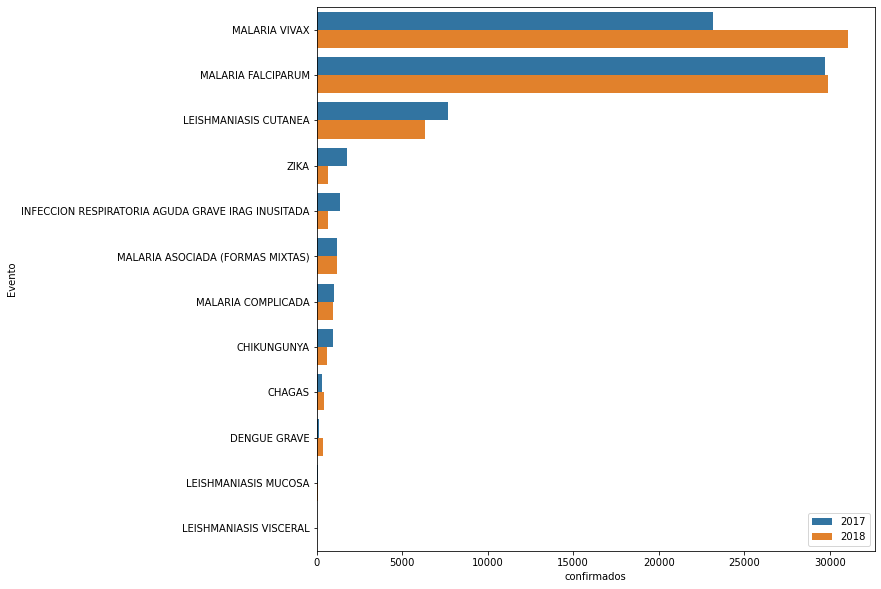

In [6]:
fig = plt.figure(figsize=(10,10))
sns.barplot(data=data_group_evento, y="Evento", x="confirmados",hue="ANO")
plt.legend(loc='lower right')

In [7]:
data_group_department=data.groupby(['Departamento_residencia','ANO']).agg({'confirmados':'sum'}).reset_index().sort_values(by=['confirmados'], ascending= False)

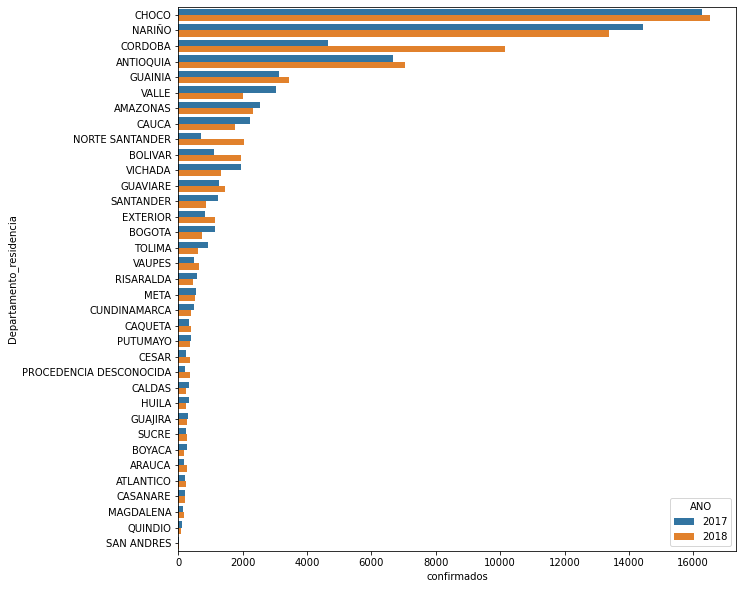

In [8]:
fig = plt.figure(figsize=(10,10))
sns.barplot(data=data_group_department, y="Departamento_residencia", x="confirmados",hue="ANO");

In [9]:
data_group_department_evento=data.groupby(['Departamento_residencia','ANO','Evento']).agg({'confirmados':'sum'}).\
                                            reset_index().sort_values(by=['confirmados'], ascending= False)

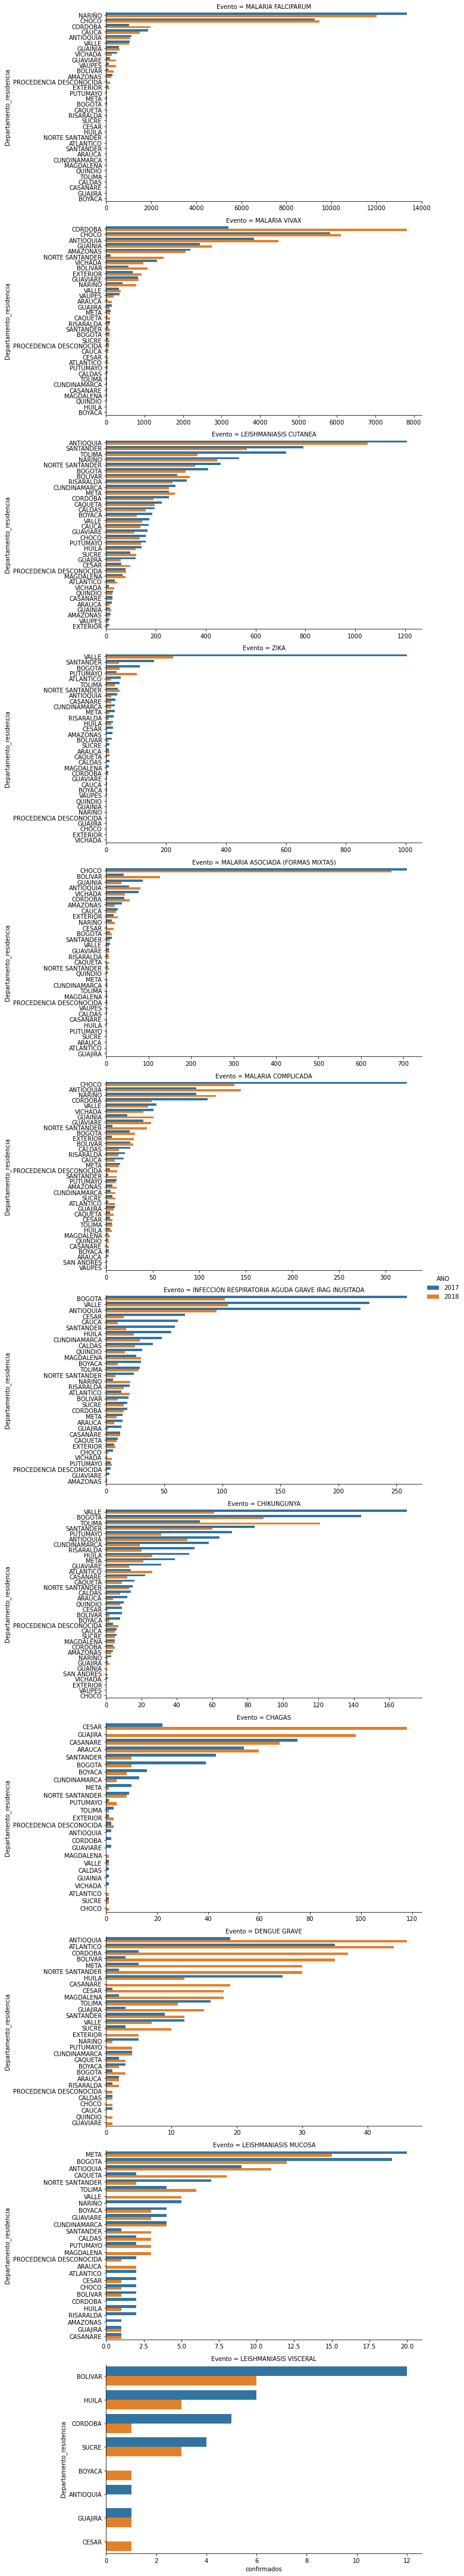

In [10]:
g = sns.catplot(data=data_group_department_evento, x='confirmados', y='Departamento_residencia', hue='ANO', row='Evento',
                kind='bar', sharex=False, sharey= False, height=5, aspect=2)